## Observations and Insights

## Dependencies and starter code

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID") 
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [68]:
# Calculate mean of tumor volume by drug regimen
mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate median of tumor volume by drug regimen
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of tumor volume by drug regimen
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of tumor volume by drug regimen
stdev = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of tumor volume by drug regimen
# SEM stands for standard error of the mean, which represents the spread that the mean of a sample of the values
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [69]:
# Create a statistic summary table
statistic_summary = pd.DataFrame({"Mean of Tumor Volume (mm3)" : mean,
                                  "Median of Tumor Volume (mm3)" : median,
                                  "Variance of Tumor Volume (mm3)" : variance,
                                  "Standard Deviation of Tumor Volume (mm3)" : stdev,
                                  "SEM of Tumor Volume (mm3)" : sem})

statistic_summary

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111



## Bar plots

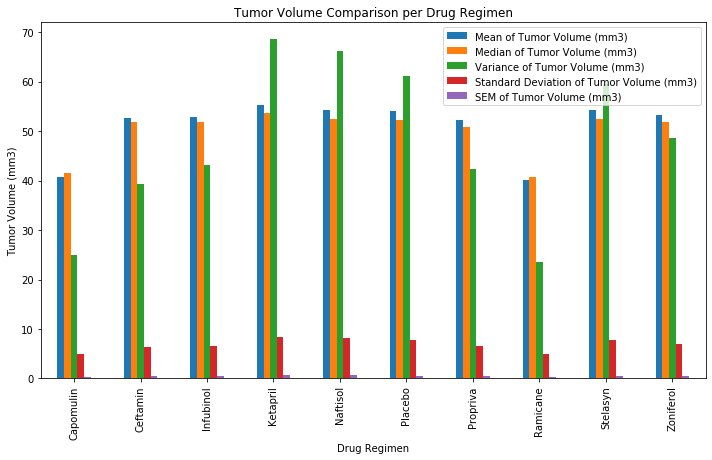

In [70]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_plot = statistic_summary.plot(kind = "bar", title = "Tumor Volume Comparison per Drug Regimen",
                                     figsize= (10,6.5), align = "center")

# Set x-axis label
pandas_plot.set_xlabel("Drug Regimen")

# Set y-axis label
pandas_plot.set_ylabel("Tumor Volume (mm3)")

# Change the layout tight to fit the whole graph
plt.tight_layout()

# Save the image
plt.savefig("Images/bar_pandas")

# Show the bar chart
plt.show()

Text(0.5, 1.0, 'Tumor Volume Comparison per Drug Regimen')

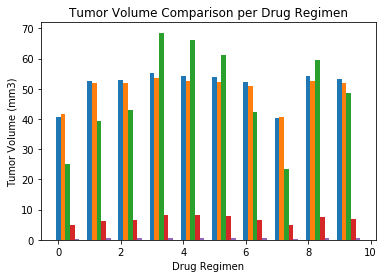

In [87]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = combined_df["Drug Regimen"].unique()
x_axis = np.arange(0,len(drug_regimen),1)

# Set the width (for not getting data overlapping)
width = 0.15  

# Plot each data
plt.bar(x_axis, mean, width, label="Mean of Tumor Volume (mm3)")
plt.bar(x_axis + width, median, width, label="Median of Tumor Volume (mm3)")
plt.bar(x_axis + width *2, variance, width, label="Variance of Tumor Volume (mm3)")
plt.bar(x_axis + width *3, stdev, width, label="Variance of Tumor Volume (mm3)")
plt.bar(x_axis + width *4, sem, width, label="Variance of Tumor Volume (mm3)")

# Change x axis label to drug regimen

# Add x axis label
plt.xlabel("Drug Regimen")

# Add y axis label
plt.ylabel("Tumor Volume (mm3)")

# Add title
plt.title("Tumor Volume Comparison per Drug Regimen")
#plt.figure(figsize=(20,20))

## Pie plots

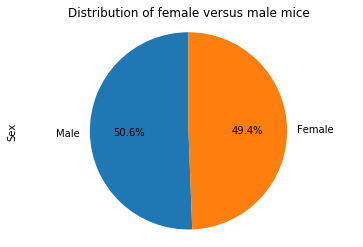

In [27]:
# Get number counts for male and female mice
gender_mice = combined_df["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice.plot(kind="pie", autopct = "%1.1f%%", startangle = 90, title = "Distribution of female versus male mice")
plt.axis("equal")
plt.show()

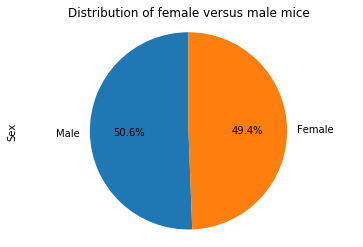

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_mice, labels = labels, autopct = "%1.1f%%", startangle = 90)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen